<a href="https://colab.research.google.com/github/kiplangat-david/DSC-WK9-IP/blob/main/Kiplangat_david_ipwk9_NaiveBayesClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Analytic question**

perform classification of the 'spambase.data' using the Naive Bayes Classifier

##**Introduction**

What is Naive Bayes algorithm?

-It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature

-Naive Bayes is an algorithm which is commonly used in natural language processing (NLP) tasks such as spam filtering, sentiment analysis, classification, recommendation

-there are 3 types naive bayes algorithms

(i) Gaussian Naive Bayes: It works with continuous attributes, it assumes the data normally distributed (Gaussian Distribution)

(ii) Multinomial Naive Bayes: It works with frequencies of features.It is used text classification or

(iii) Bernoulli Naive Bayes: It works with multinomial binary variables, usually used for text classification like multinomial


We will use Multinomal in this notebook.

#Experimental Design

- Import Libraries
- Load Dataset
- Data Cleaning
- Exploratory Data Analysis
- Splitting Dataset
- Train the Model
- Model optimization
- Conclusions
- Recommendations

##**Data Relevance**

We sourced our dataset [here](https://archive.ics.uci.edu/ml/datasets/Spambase)The dataset contains 'spambase.data'  denoting whether the e-mail was considered spam (1) or not (0). 

Our dataset contains 4601 instances and 58 attributes. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The above nature of our dataset makes it relevant for our study.


##**Import Libraries**

In [113]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
palette = ['blue','pink']
sns.set_palette(palette)
import warnings
warnings.filterwarnings("ignore")

##**Load Data**

In [52]:
#loading data
data = pd.read_csv('/content/spambase.data',header=None)

In [38]:
#preview top 5 records
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [39]:
#preview bottom 5 records
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


Our dataset contains the expected rows and columns

In [40]:
#check dataset shape
data.shape

(4601, 58)

Our dataset contains 4601 instances and 58 attributes

In [41]:
#check summary inormation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4601 non-null   float64
 1   1       4601 non-null   float64
 2   2       4601 non-null   float64
 3   3       4601 non-null   float64
 4   4       4601 non-null   float64
 5   5       4601 non-null   float64
 6   6       4601 non-null   float64
 7   7       4601 non-null   float64
 8   8       4601 non-null   float64
 9   9       4601 non-null   float64
 10  10      4601 non-null   float64
 11  11      4601 non-null   float64
 12  12      4601 non-null   float64
 13  13      4601 non-null   float64
 14  14      4601 non-null   float64
 15  15      4601 non-null   float64
 16  16      4601 non-null   float64
 17  17      4601 non-null   float64
 18  18      4601 non-null   float64
 19  19      4601 non-null   float64
 20  20      4601 non-null   float64
 21  21      4601 non-null   float64
 22  

-All the 58 variables in our dataset are numerical.

-There are 55 float type and 3 integer type

-The first 57 variables are independent variables and the last variable will be our target variable. We will rename this target variable from '57' to 'class'

##**Data Preprocessing**

Here will:

-Map column names to string and rename last column to 'class'

-Check and deal with missing values

-Check and deal with duplicates

-Check and handle outliers and anomalies

In [58]:
#map column names to string
data.columns = data.columns.map(str)

#rename last column to class
data.rename({'57':'class'},axis=1,inplace=True)

In [45]:
#check null values
data.isnull().sum().sum()

0

Our dataset has no null values.

So we will proceed and check for duplicates

In [53]:
#check duplicates
data.duplicated().sum()


391

Our dataset contains 391 duplicates. We will drop these duplicates as our dataset is large enough dropping them will not cost us.

##**Handling Outliers**

**Interquartile Range Method**

IQR is the range between the first and the third quartiles namely Q1 and Q3: IQR = Q3 – Q1. The data points which fall below Q1 – 1.5IQR(boxplot lower whisker) or above Q3 + 1.5IQR(boxplot upper whisker) are outliers.


In [80]:
def out_iqr(data , column):
    global lower,upper
    q25, q75 = np.quantile(data[column], 0.25), np.quantile(data[column], 0.75)
    # calculate the IQR
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    # calculate the lower and upper bound value
    lower, upper = q25 - cut_off, q75 + cut_off
    print('The IQR is',iqr)
    print('The lower bound value is', lower)
    print('The upper bound value is', upper)
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = data[data[column] > upper]
    df2 = data[data[column] < lower]
    return print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

In [84]:
out_iqr(data,'class')

The IQR is 1.0
The lower bound value is -1.5
The upper bound value is 2.5
Total number of outliers are 0


The function above prompts us to input the coulumn and then return the number of outliers present in that column.

Let's represent this in a visualization

Text(0.5, 1.0, 'Class Outlier ')

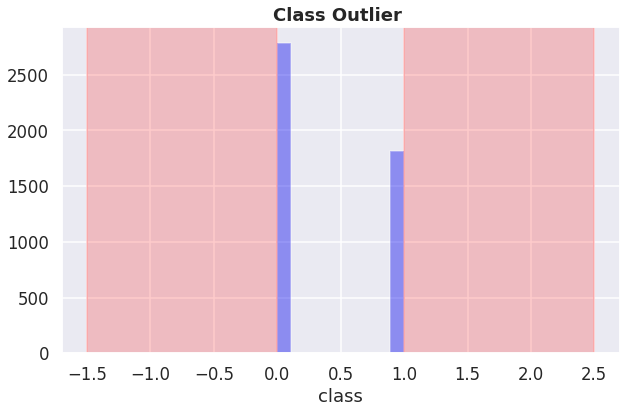

In [122]:
plt.figure(figsize = (10,6))
sns.distplot(data['class'], kde=False)
plt.axvspan(xmin = lower,xmax= data['class'].min(),alpha=0.2, color='red')
plt.axvspan(xmin = upper,xmax= data['class'].max(),alpha=0.2, color='red')
plt.title('Class Outlier ',weight='bold')

Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

##**Exploratory Data Analysis**

In [89]:
#data summary statistics
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,0.000000,0.800000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,2.640000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.315000,0.052000,0.00000

In [90]:
#check class distribution
data['class'].value_counts()

0    2788
1    1813
Name: class, dtype: int64

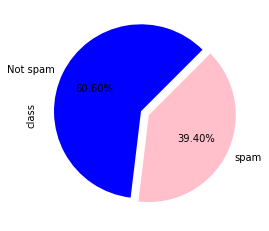

In [100]:
#percentage of passenger survival?
colors = ['pink','grey']
labels = ['Not spam','spam']
data['class'].value_counts().plot(kind='pie',autopct='%.2f%%',labels=labels,explode=(0.1,0),startangle=45)

There are less spam emails(39.40%)

##**Declare feature and target variable**

In [101]:
#split data
X = data.drop(['class'], axis=1).values

y = data['class'].values

##**Split data into separate training and test set**

In [102]:
# split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##**Feature Engineering**

Here we will use LASSO to perform dimensionality reduction.  LASSO does true dimensionality reduction since it forces many of the beta coefficients to be 0. 

Also by setting the positive parameter to True, LASSO forces the coefficients to be positive

In [106]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(positive=True)
lasso.fit(X_train,y_train)
lasso.coef_

#print LASSO coefficicients
coef = pd.Series(lasso.coef_, index = data.drop(['class'],1).columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")



Lasso picked 6 variables and eliminated the other 51 variables


The above results tells that LASSO shrinked 51 variables to zero and only 6 variables remained positive

##**Build the model**

-We will perform classification of the testing set samples using the Naive Bayes Classifier(MultinomialNB)-Multinomial Naive Bayes works with frequencies of features.It is used text classification.

-We will train the model with:

        -80-20 split ratio
        -70-30 split ratio
        -60-40 split ratio
-Choose the best model and optimize


##**Train model with 80-20 split ratio**

In [107]:
#train model with 80-20 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#train the model
mn = MultinomialNB()
mn.fit(X_train, y_train)

#make predictions
y_pred = mn.predict(X_test)


#model evaluation:
#
#using accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# model evaluation using confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.8122
Confusion matrix

 [[454  84]
 [ 89 294]]

True Positives(TP) =  454

True Negatives(TN) =  294

False Positives(FP) =  84

False Negatives(FN) =  89


-Our model has an accuracy of 81.22%. This shows that our model does a descent job in classification

The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 454

True Negatives (Actual Negative:0 and Predict Negative:0) - 294

False Positives (Actual Negative:0 but Predict Positive:1) - 84 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 89 (Type II error)

Therefore, our model has 454 + 294 = 748 correct classifications and 84 + 89 = 173 incorrect classifications


##**Train model with 70_30 split ratio**

In [108]:
#train model with 70-30 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

#train the model
mn = MultinomialNB()
mn.fit(X_train, y_train)

#make predictions
y_pred = mn.predict(X_test)


#model evaluation:
#
#using accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# model evaluation using confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.8096
Confusion matrix

 [[699 123]
 [140 419]]

True Positives(TP) =  699

True Negatives(TN) =  419

False Positives(FP) =  123

False Negatives(FN) =  140


-Our model has an accuracy of 80.96%. This shows that our model does a descent job in classification

The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 699

True Negatives (Actual Negative:0 and Predict Negative:0) - 419

False Positives (Actual Negative:0 but Predict Positive:1) - 123 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 140 (Type II error)

Therefore, our model has 699 + 419 = 1118 correct classifications and 123 + 140 = 263 incorrect classifications

Note

-There is a slight fall in accuracy

-Number of correct and incorrect classifications increased

-Icreased chance of making type I & II errors

##**Train model with 60-40 split ratio**

In [109]:
#train model with 60-40 split ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

#train the model
mn = MultinomialNB()
mn.fit(X_train, y_train)

#make predictions
y_pred = mn.predict(X_test)


#model evaluation:
#
#using accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# model evaluation using confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.8099
Confusion matrix

 [[952 145]
 [205 539]]

True Positives(TP) =  952

True Negatives(TN) =  539

False Positives(FP) =  145

False Negatives(FN) =  205


-Our model has an accuracy of 80.99%. This shows that our model does a descent job in classification

The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 952

True Negatives (Actual Negative:0 and Predict Negative:0) - 539

False Positives (Actual Negative:0 but Predict Positive:1) - 145 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 205 (Type II error)

Therefore, our model has 952 + 539 = 1491 correct classifications and 145 + 205 = 350 incorrect classifications

Note

-There is a slight increase in accuracy compared to the above model

-Number of correct and incorrect classifications increased

-Icreased chance of making type I & II errors

##**Model optimization**

We will improve our first model because itss performance is better compared with the other models. We will standardise the data and check performance improvement

Text(0.5, 1.0, 'Scaled data')

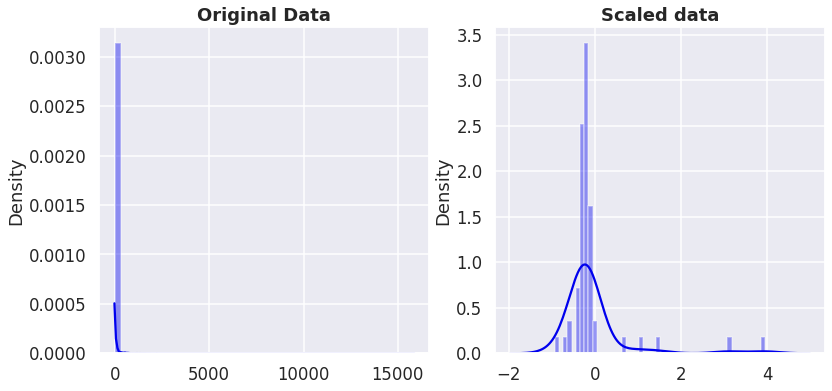

In [114]:
#declare ttrain & test sets(with 80-20 split ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#scale data
sc = StandardScaler()
scaled_data = sc.fit_transform(X_train)

# visualize to compare distribution of the original vs scaled data
sns.set(rc = {'figure.figsize':(13,6)})
sns.set_context('talk')
sns.set_palette('flag_r')
fig, ax=plt.subplots(1,2)
sns.distplot(X_train, ax=ax[0])
ax[0].set_title('Original Data',weight='bold')
sns.distplot(scaled_data[0], ax=ax[1])
ax[1].set_title('Scaled data',weight='bold')

We can see that scaled data distribution looks normal though positively skewed

We will use this scaled data in training our model

In [117]:
#train the model
mn = MultinomialNB()
mn.fit(X_train, y_train)

#make predictions
y_pred = mn.predict(X_test)


#model evaluation:
#
#using accuracy score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

# model evaluation using confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Model accuracy score: 0.8122
Confusion matrix

 [[454  84]
 [ 89 294]]

True Positives(TP) =  454

True Negatives(TN) =  294

False Positives(FP) =  84

False Negatives(FN) =  89


No change in model performance
-It has an accuracy of 81.22%

The confusion matrix shows:

True Positives (Actual Positive:1 and Predict Positive:1) - 454

True Negatives (Actual Negative:0 and Predict Negative:0) - 294

False Positives (Actual Negative:0 but Predict Positive:1) - 84 (Type I error)

False Negatives (Actual Positive:1 but Predict Negative:0) - 89 (Type II error)

Therefore, our model has 454 + 294 = 748 correct classifications and 84 + 89 = 173 incorrect classifications


##**Challenging the solution**

**Check for overfitting and Underfitting**

If our model does much better on the training set than on the test set, then we're likely overfitting. For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set

on the other hand, an underfit model doesn't fully learn each and every example in the dataset. In such cases, we see a low score on both the training set and test/validation

In [119]:
print('Training set score: {:.4f}'.format(mn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(mn.score(X_test, y_test)))

Training set score: 0.8022
Test set score: 0.8122


The training-set accuracy score is 80.22% while the test-set accuracy to be 81.22% These two values are quite comparable. So, there is no question of overfitting

##**Conclusions**
-Our model performance ranges between 80.00%-81.22% which means our model is doing a very good job in terms of classification. However, this accuracy score does not give the underlying distribution of values neither does it tell anything about the type of errors our classifer is making. So, we used confusion matrix

-Our model does well with 80:20 split ratio. Chances of making errors increased with 70:30 and 60:40 ratios and for this can lead to overfitting or underfitting

-Our best performing model have 81.22% accuracy. This means this model makes an error of 18.18%

##**Recommendations**

Naive Bayes (MultinomialNB) classifier does a descent job in this classification. However, more methods of model optimization should be looked into to minimize model chance of making errors to as low as less than 10%